In [82]:
#standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [83]:
#actual dataset is quite large, so first looking at filters first
#a glance at all these they can be imported as categories to save memory
indicators = pd.read_csv('ZILLOW_INDICATORS.csv')
regions = pd.read_csv('ZILLOW_REGIONS.csv')
print(indicators.head(),indicators.info())
print(regions.head(),regions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   indicator_id  56 non-null     object
 1   indicator     56 non-null     object
 2   category      56 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB
  indicator_id                                          indicator  \
0         SAAW  Median Sale Price (Smooth & Seasonally Adjuste...   
1         SRAM        Median Sale Price (Raw, All Homes, Monthly)   
2         NSAM  Median Days to Pending (Smooth, All Homes, Mon...   
3         RSNA  ZORI (Smoothed): All Homes Plus Multifamily Ti...   
4         RSSA  ZORI (Smoothed, Seasonally Adjusted): All Home...   

              category  
0  Inventory and sales  
1  Inventory and sales  
2  Inventory and sales  
3              Rentals  
4              Rentals   None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89305 entries, 0 to 89304
Da

In [84]:
#based on info, we can set indexes with id columns and change types to categories for others
indicators = indicators.astype({'indicator_id': 'string', 'indicator': 'category', 'category': 'category'})
regions = regions.astype({'region_type': 'category', 'region': 'category'})
indicators.set_index('indicator_id')
regions.set_index('region_id')
print(indicators)
print(regions)

   indicator_id                                          indicator  \
0          SAAW  Median Sale Price (Smooth & Seasonally Adjuste...   
1          SRAM        Median Sale Price (Raw, All Homes, Monthly)   
2          NSAM  Median Days to Pending (Smooth, All Homes, Mon...   
3          RSNA  ZORI (Smoothed): All Homes Plus Multifamily Ti...   
4          RSSA  ZORI (Smoothed, Seasonally Adjusted): All Home...   
5          ZATT           ZHVI All Homes- Top Tier Time Series ($)   
6          ZSFH           ZHVI Single-Family Homes Time Series ($)   
7          ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
8          ZCON                   ZHVI Condo/Co-op Time Series ($)   
9          ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   
10         Z5BR                    ZHVI 5+ Bedroom Time Series ($)   
11         Z2BR                     ZHVI 2-Bedroom Time Series ($)   
12         Z3BR                     ZHVI 3-Bedroom Time Series ($)   
13         Z1BR     

In [85]:
#based  on the indicators, we'll start with pulling data just for the 'home values' category
home_values_indicators = indicators[indicators['category'] == 'Home values'].copy()
print(home_values_indicators)

   indicator_id                                          indicator  \
5          ZATT           ZHVI All Homes- Top Tier Time Series ($)   
6          ZSFH           ZHVI Single-Family Homes Time Series ($)   
7          ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
8          ZCON                   ZHVI Condo/Co-op Time Series ($)   
9          ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   
10         Z5BR                    ZHVI 5+ Bedroom Time Series ($)   
11         Z2BR                     ZHVI 2-Bedroom Time Series ($)   
12         Z3BR                     ZHVI 3-Bedroom Time Series ($)   
13         Z1BR                     ZHVI 1-Bedroom Time Series ($)   
14         Z4BR                     ZHVI 4-Bedroom Time Series ($)   

       category  
5   Home values  
6   Home values  
7   Home values  
8   Home values  
9   Home values  
10  Home values  
11  Home values  
12  Home values  
13  Home values  
14  Home values  


In [86]:
#the zillow_data csv is quite large, so we'll bring in a sample subset 
df = pd.read_csv('ZILLOW_DATA.csv',nrows=500)
print(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   indicator_id  500 non-null    object 
 1   region_id     500 non-null    int64  
 2   date          500 non-null    object 
 3   value         500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB
  indicator_id  region_id        date     value
0         ZATT       3101  1998-01-31  338849.0
1         ZATT       3101  1998-02-28  342993.0
2         ZATT       3101  1998-03-31  346763.0
3         ZATT       3101  1998-04-30  349356.0
4         ZATT       3101  1998-05-31  351981.0 None


In [87]:
#from this sample subset we can change some subtypes and parse by date when reading in the entire csv
home_values = pd.read_csv('ZILLOW_DATA.csv',dtype={'indicator_id':'category', 'region_id':'category'}, parse_dates=['date'])
print(home_values.head(),home_values.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159415321 entries, 0 to 159415320
Data columns (total 4 columns):
 #   Column        Dtype         
---  ------        -----         
 0   indicator_id  category      
 1   region_id     category      
 2   date          datetime64[ns]
 3   value         float64       
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 3.1 GB
  indicator_id region_id       date     value
0         ZATT      3101 1998-01-31  338849.0
1         ZATT      3101 1998-02-28  342993.0
2         ZATT      3101 1998-03-31  346763.0
3         ZATT      3101 1998-04-30  349356.0
4         ZATT      3101 1998-05-31  351981.0 None


In [96]:
#filter only rows in the home_value category
home_values = home_values[home_values['indicator_id'].isin(home_values_indicators['indicator_id'])]
home_values['indicator_id'] = home_values['indicator_id'].cat.remove_unused_categories()
print(home_values.head(),home_values.info())

<class 'pandas.core.frame.DataFrame'>
Index: 151462324 entries, 0 to 159415277
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   indicator_id  category      
 1   region_id     category      
 2   date          datetime64[ns]
 3   value         float64       
 4   year          int32         
dtypes: category(2), datetime64[ns](1), float64(1), int32(1)
memory usage: 4.7 GB
  indicator_id region_id       date     value  year
0         ZATT      3101 1998-01-31  338849.0  1998
1         ZATT      3101 1998-02-28  342993.0  1998
2         ZATT      3101 1998-03-31  346763.0  1998
3         ZATT      3101 1998-04-30  349356.0  1998
4         ZATT      3101 1998-05-31  351981.0  1998 None


In [116]:
#yearly mean/median data as well as YoY change of these values. with some larger values within the dataset, median may be more accurate, so we will look at both
print(home_values['indicator_id'].unique())
home_values['year'] = home_values['date'].dt.year
summary_yr = home_values.groupby('year')['value'].agg(['mean','median']).reset_index()
summary_yr = summary_yr.round({'mean': 2, 'median': 0})
#i also want to see the YoY change as a %
#we can go ahead and make this into a function as we will likely use it later

def get_mean_median_YoY_change(df):
    #initialize list with 0 as first row will have nothing compared to it
    temp_mean_list   = [0]
    temp_median_list = [0]
    #iterate through each year, calculcate % change from prev year to current and append this to a list
    for i in range(len(df['year'])-1):
        temp_mean_list.append(((  df['mean'][i+1]   / df['mean'][i]) -   1) * 100)
        temp_median_list.append(((df['median'][i+1] / df['median'][i]) - 1) * 100)
    #a quick rounding to 2 decimal places
    temp_mean_list   = [round(elem, 2) for  elem in temp_mean_list]
    temp_median_list = [round(elem, 2) for  elem in temp_median_list]
#add list as column to the dataframe
    df['% Change YoY of Mean'] = temp_mean_list
    df['% Change YoY of Median'] = temp_median_list
    return df

get_mean_median_YoY_change(summary_yr)
print(summary_yr)

['ZATT', 'Z3BR', 'ZSFH', 'Z5BR', 'ZALL', 'Z2BR', 'Z4BR', 'ZCON', 'Z1BR', 'ZABT']
Categories (10, object): ['Z1BR', 'Z2BR', 'Z3BR', 'Z4BR', ..., 'ZATT', 'ZCON', 'ZSFH', 'ZABT']
    year       mean    median  % Change YoY of Mean  % Change YoY of Median
0   1996  141338.20  115749.0                  0.00                    0.00
1   1997  145422.93  118913.0                  2.89                    2.73
2   1998  151442.68  122628.0                  4.14                    3.12
3   1999  158770.94  126769.0                  4.84                    3.38
4   2000  164579.61  127276.0                  3.66                    0.40
5   2001  177784.87  134446.0                  8.02                    5.63
6   2002  189621.28  141862.0                  6.66                    5.52
7   2003  203745.02  149987.0                  7.45                    5.73
8   2004  222609.07  161130.0                  9.26                    7.43
9   2005  236202.26  165703.0                  6.11             

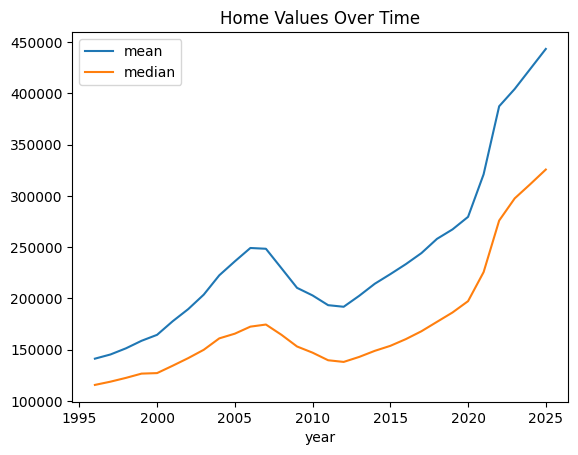

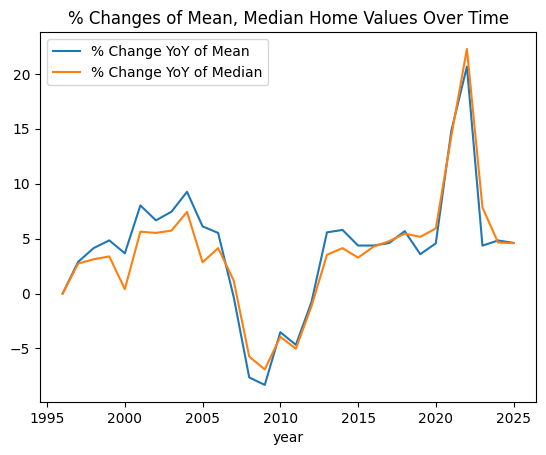

In [98]:
#quick graph of mean, median over time for all home values
summary_yr.plot(x='year', y=['mean', 'median'])
plt.title('Home Values Over Time')
plt.show()
summary_yr.plot(x='year', y=['% Change YoY of Mean', '% Change YoY of Median'])
plt.title('% Changes of Mean, Median Home Values Over Time')
plt.show()

In [104]:
#lets do summary stats by year and and indicator
summary_by_category = home_values.groupby(['year','indicator_id'])['value'].agg(['mean', 'median']).reset_index()
summary_by_category = summary_by_category.round({'mean': 2, 'median': 2})
temp_df = pd.DataFrame()
for indicator in home_values_indicators['indicator_id']:
    temp_df = summary_by_category[summary_by_category['indicator_id'] == indicator]
    print(temp_df)

C:\Users\Tyler\AppData\Local\Temp\ipykernel_22712\2614778035.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_by_category = home_values.groupby(['year','indicator_id'])['value'].agg(['mean', 'median']).reset_index()


     year indicator_id       mean     median
6    1996         ZATT  192613.99  159049.00
16   1997         ZATT  196767.74  163041.50
26   1998         ZATT  203246.85  167390.00
36   1999         ZATT  211042.79  171260.00
46   2000         ZATT  238117.85  188811.98
56   2001         ZATT  254105.01  197381.83
66   2002         ZATT  269334.10  206445.89
76   2003         ZATT  287297.79  215547.85
86   2004         ZATT  311452.25  229344.65
96   2005         ZATT  320086.35  230257.00
106  2006         ZATT  333319.54  236259.00
116  2007         ZATT  332878.80  239714.17
126  2008         ZATT  307913.29  228134.00
136  2009         ZATT  287567.09  221281.49
146  2010         ZATT  276922.59  214216.98
156  2011         ZATT  265035.80  206145.82
166  2012         ZATT  264612.59  208444.00
176  2013         ZATT  274204.59  214445.74
186  2014         ZATT  285157.70  220529.31
196  2015         ZATT  294142.07  226838.49
206  2016         ZATT  305657.13  236296.18
216  2017 

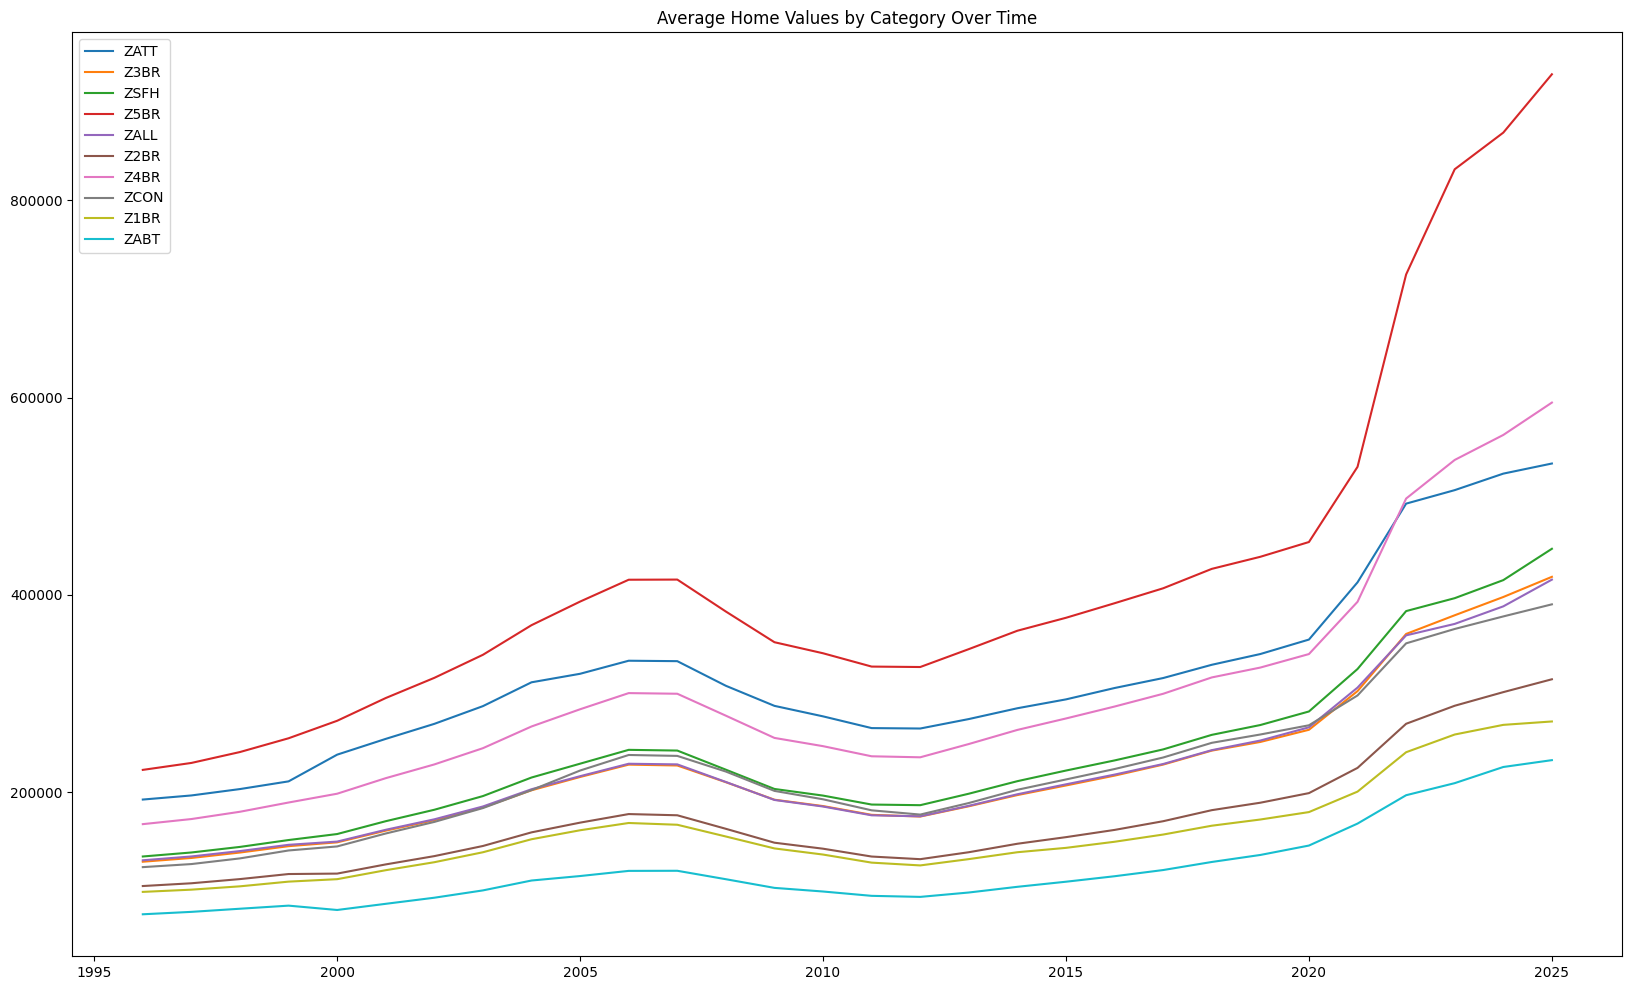

In [100]:
temp_df = pd.DataFrame()
fig, ax = plt.subplots(figsize=(20,12))
for indicator in home_values['indicator_id'].unique():
    temp_df = summary_by_category[summary_by_category['indicator_id'] == indicator]
    ax.plot('year', 'mean', data= temp_df, label = indicator)
plt.title('Average Home Values by Category Over Time')
plt.legend()
plt.show()

    index  year indicator_id       mean     median
0       4  1996         Z5BR  222678.34  182886.00
1      14  1997         Z5BR  229721.42  188024.00
2      24  1998         Z5BR  240780.97  195089.00
3      34  1999         Z5BR  254726.22  203029.00
4      44  2000         Z5BR  272456.58  211137.00
5      54  2001         Z5BR  295513.45  223318.00
6      64  2002         Z5BR  315963.73  235821.00
7      74  2003         Z5BR  339330.92  249723.26
8      84  2004         Z5BR  369350.75  268242.24
9      94  2005         Z5BR  393270.01  279018.30
10    104  2006         Z5BR  415410.22  291988.27
11    114  2007         Z5BR  415566.43  295233.60
12    124  2008         Z5BR  383168.15  275847.00
13    134  2009         Z5BR  352074.53  255612.50
14    144  2010         Z5BR  340874.99  246028.92
15    154  2011         Z5BR  327380.07  234977.00
16    164  2012         Z5BR  326938.78  232949.00
17    174  2013         Z5BR  345083.26  241757.00
18    184  2014         Z5BR  3

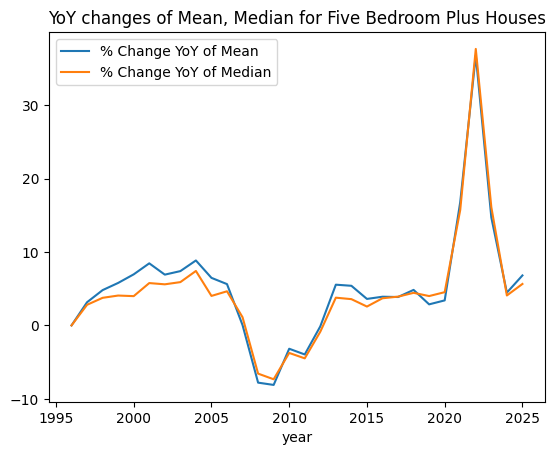

In [117]:
#based on the data, we can see there is a pretty large increase from 2020-2021-2022 YoY.
#from the graphs separated by category, we can see that Z5BR (5 bedrooms+) had a substantially larger increase, so I'm curious to see this type of home's YoY change
#we'll first need to separate out the data on this specific category
five_bedrooms_plus = summary_by_category[summary_by_category['indicator_id'] == 'Z5BR'].reset_index()
print(five_bedrooms_plus)
#now lets calculcate YoY change and 
get_mean_median_YoY_change(five_bedrooms_plus)
print(five_bedrooms_plus)
#graph YoY changes
five_bedrooms_plus.plot(x='year', y=['% Change YoY of Mean', '% Change YoY of Median'])
plt.title('YoY changes of Mean, Median for Five Bedroom Plus Houses')
plt.show()

#wow! a 36.80% increase  from 2021 to 2022